In [3]:
##https://www.kaggle.com/datasets/hieudaotrung/gear-vibration?resource=download###

!pip install ucimlrepo

In [4]:
import pandas as pd

import numpy as np

Proyecto = pd.read_csv('eccentricity.csv')
Proyecto.head()

sensor1   sensor2                      time_x  speedSet  load_value  \
0  2.522315  2.431974  2023-05-03 20:31:39.000000  8.332031           0   
1  2.523629  2.431317  2023-05-03 20:31:39.000200  8.332031           0   
2  2.522644  2.428032  2023-05-03 20:31:39.000400  8.332031           0   
3  2.521987  2.430660  2023-05-03 20:31:39.000600  8.332031           0   
4  2.522808  2.430168  2023-05-03 20:31:39.000800  8.332031           0   

  gear_fault_desc  
0    eccentricity  
1    eccentricity  
2    eccentricity  
3    eccentricity  
4    eccentricity

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
Proyecto_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = Proyecto_quality.data.features
y = Proyecto_quality.data.targets

# metadata
print(Proyecto_quality.metadata)

# variable information
print(Proyecto_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [6]:
#  clousstering y clasifficacion

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
X['cluster'] = cluster_labels

# Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-c1f6fe7fe562>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = cluster_labels
<ipython-input-6-c1f6fe7fe562>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy: 0.6792307692307692


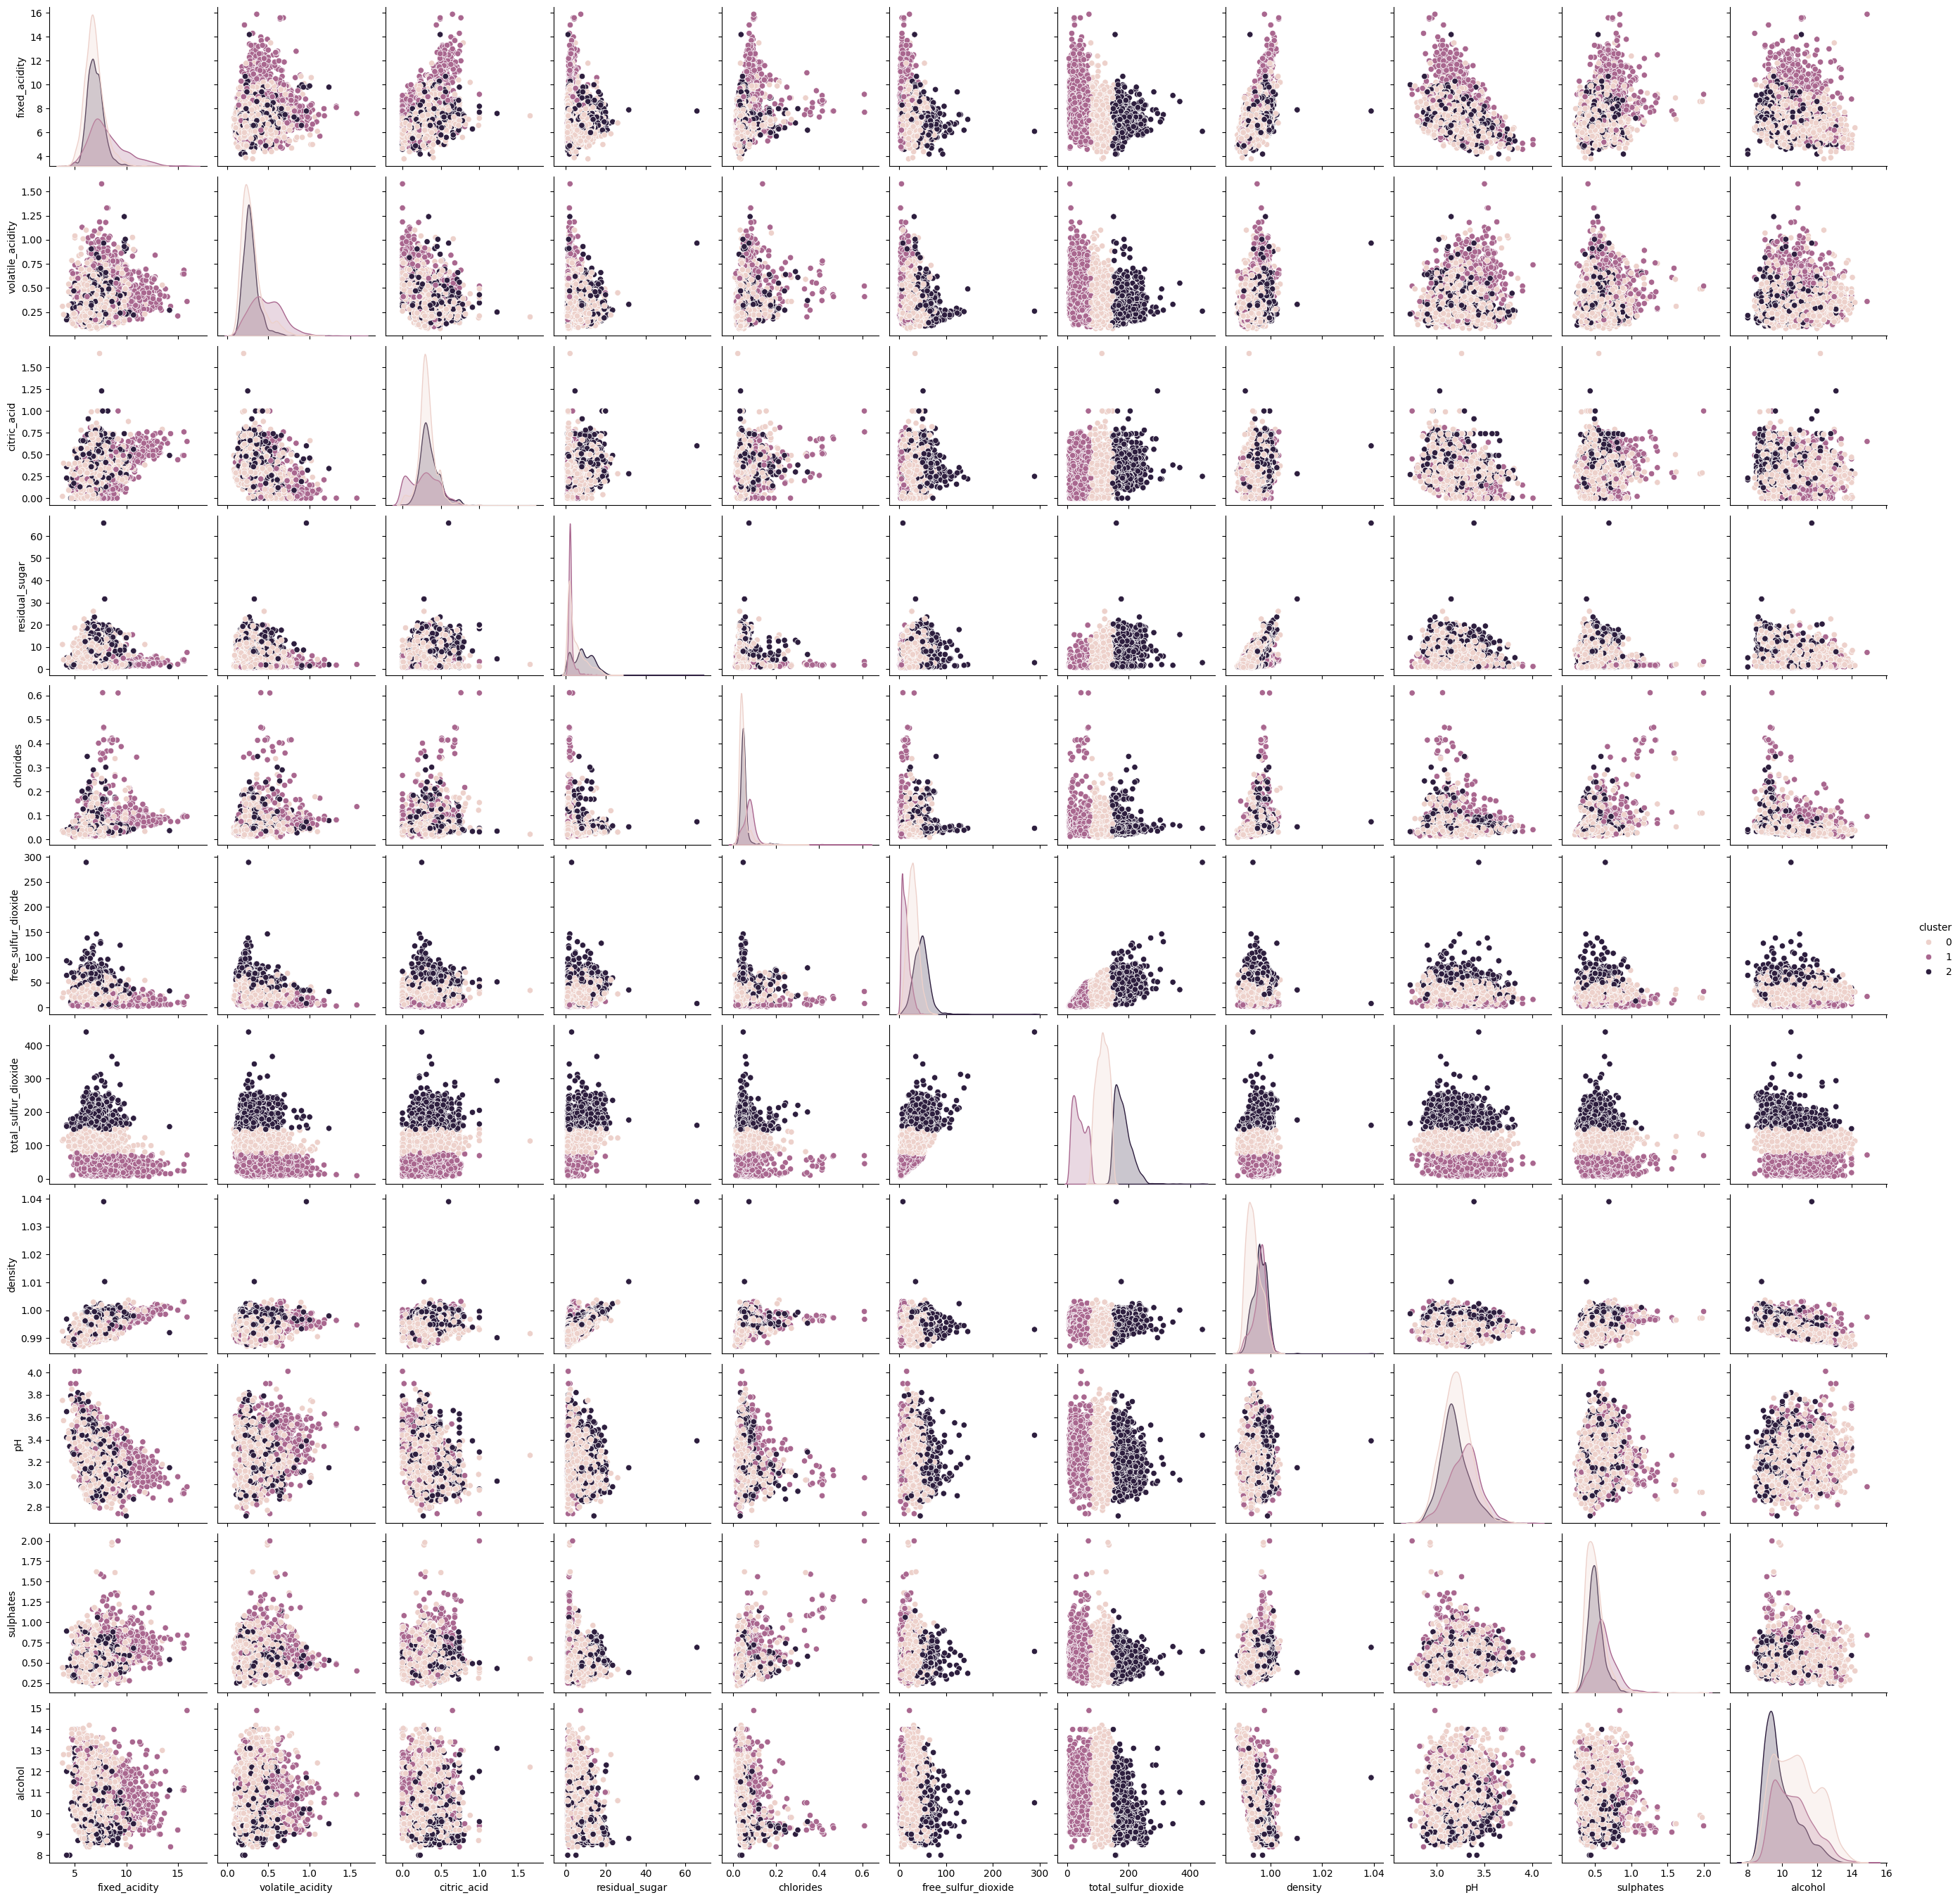

In [7]:


import matplotlib.pyplot as plt
import seaborn as sns

#  cluster labels
sns.pairplot(X, hue='cluster', vars=X.columns[:-1])  # Exclude the 'cluster' column itself
plt.show()


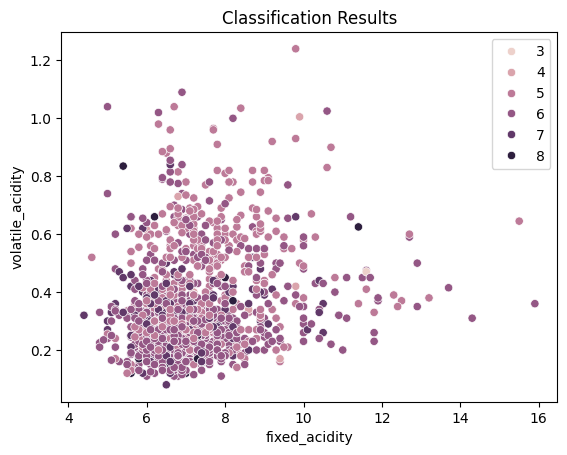

In [8]:


import matplotlib.pyplot as plt
# classification
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Classification Results")
plt.show()


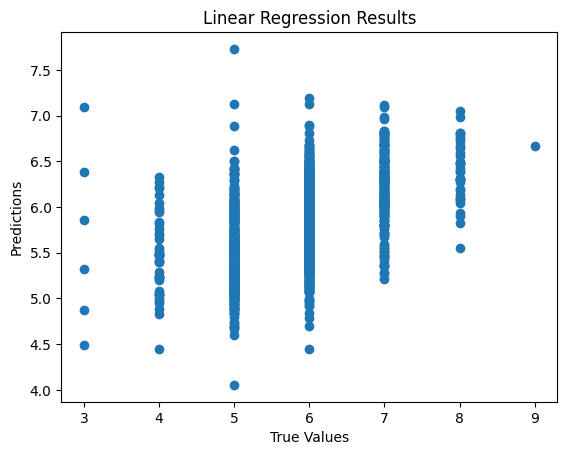

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Results")
plt.show()

Epoch 1/10
163/163 [==============================] - 1s 3ms/step - loss: 11.6489
Epoch 2/10
163/163 [==============================] - 1s 3ms/step - loss: 0.8669
Epoch 3/10
163/163 [==============================] - 1s 4ms/step - loss: 0.7440
Epoch 4/10
163/163 [==============================] - 0s 2ms/step - loss: 0.6788
Epoch 5/10
163/163 [==============================] - 0s 2ms/step - loss: 0.6627
Epoch 6/10
163/163 [==============================] - 1s 3ms/step - loss: 0.6322
Epoch 7/10
163/163 [==============================] - 1s 3ms/step - loss: 0.6174
Epoch 8/10
163/163 [==============================] - 1s 4ms/step - loss: 0.6108
Epoch 9/10
163/163 [==============================] - 1s 5ms/step - loss: 0.6222
Epoch 10/10
41/41 [==============================] - 0s 3ms/step
Neural Network Mean Squared Error: 0.6648426844294086
Linear Regression Mean Squared Error: 0.547436127498097


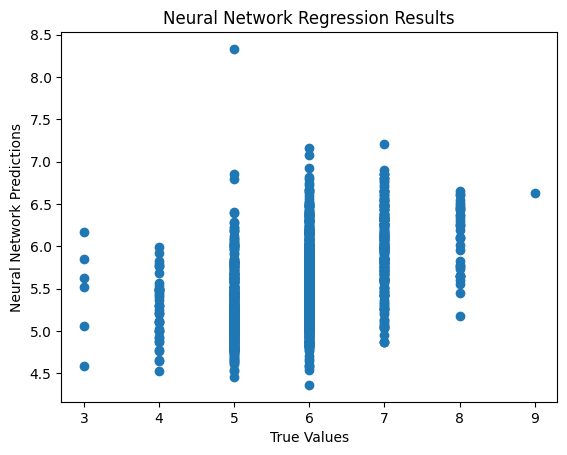

In [10]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# ... (previous code) ...

# Neural Network with one hidden layer
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer
  keras.layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse')  # Mean squared error for regression

model.fit(X_train, y_train, epochs=10)  # Adjust epochs as needed

y_pred_nn = model.predict(X_test)

# Evaluate the neural network model
from sklearn.metrics import mean_squared_error
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Mean Squared Error:", mse_nn)

# Compare with linear regression
mse_lr = mean_squared_error(y_test, y_pred)  # y_pred from LinearRegression
print("Linear Regression Mean Squared Error:", mse_lr)

# Visualize neural network predictions
plt.scatter(y_test, y_pred_nn)
plt.xlabel("True Values")
plt.ylabel("Neural Network Predictions")
plt.title("Neural Network Regression Results")
plt.show()


Neural Network Mean Absolute Error: 0.6272777080535888
Linear Regression Mean Absolute Error: 0.5670209340246423
Neural Network R-squared Score: 0.09979606785298767
Linear Regression R-squared Score: 0.25876577103941223


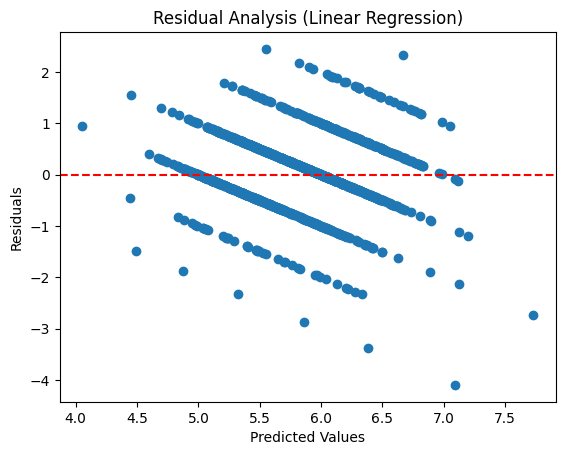

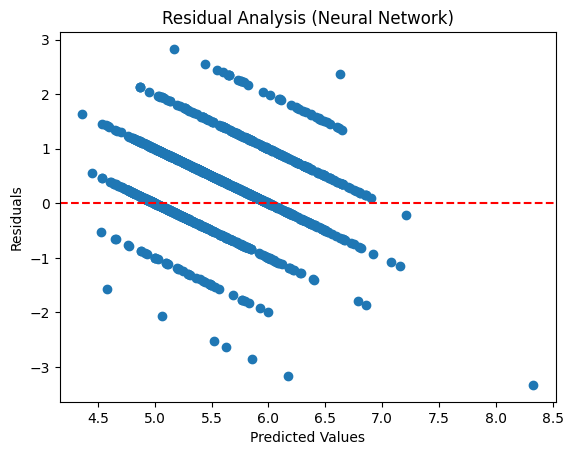

'\nInterpretación de los resultados:\n\n- Compare las puntuaciones de MSE, MAE y R2 para ambos modelos. MSE y MAE más bajos indican una mejor precisión, mientras que una puntuación R2 más alta (más cercana a 1) sugiere un mejor ajuste.\n- Analizar las parcelas residuales. Idealmente, los residuos deberían estar dispersos aleatoriamente alrededor de cero sin patrones claros. Esto indica que los errores del modelo son aleatorios y no sistemáticos.\n\nFactibilidad:\n\n- Considerar el contexto del problema y los niveles de error aceptables.\n- Si los errores están dentro de límites aceptables y los modelos cumplen con los requisitos del proyecto, se pueden considerar factibles.\n\nMejoras adicionales (si es necesario):\n\n- Ingeniería de funciones: explore la creación de nuevas funciones o la transformación de las existentes para mejorar el rendimiento del modelo.\n- Ajuste de hiperparámetros: optimice los hiperparámetros de los modelos (por ejemplo, número de capas, neuronas, tasa de apre

In [11]:


import matplotlib.pyplot as plt
# Calculate and print additional metrics for evaluation

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mae_lr = mean_absolute_error(y_test, y_pred)
print("Neural Network Mean Absolute Error:", mae_nn)
print("Linear Regression Mean Absolute Error:", mae_lr)

# R-squared (R2) score
from sklearn.metrics import r2_score
r2_nn = r2_score(y_test, y_pred_nn)
r2_lr = r2_score(y_test, y_pred)
print("Neural Network R-squared Score:", r2_nn)
print("Linear Regression R-squared Score:", r2_lr)

# Residual Analysis for Linear Regression
residuals_lr = y_test - y_pred
plt.scatter(y_pred, residuals_lr)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis (Linear Regression)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Residual Analysis for Neural Network
residuals_nn = y_test.values.flatten() - y_pred_nn.flatten() # Convert y_test to a NumPy array before subtraction
plt.scatter(y_pred_nn, residuals_nn)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis (Neural Network)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Discussion on feasibility and error levels
"""
Interpretación de los resultados:

- Compare las puntuaciones de MSE, MAE y R2 para ambos modelos. MSE y MAE más bajos indican una mejor precisión, mientras que una puntuación R2 más alta (más cercana a 1) sugiere un mejor ajuste.
- Analizar las parcelas residuales. Idealmente, los residuos deberían estar dispersos aleatoriamente alrededor de cero sin patrones claros. Esto indica que los errores del modelo son aleatorios y no sistemáticos.

Factibilidad:

- Considerar el contexto del problema y los niveles de error aceptables.
- Si los errores están dentro de límites aceptables y los modelos cumplen con los requisitos del proyecto, se pueden considerar factibles.

Mejoras adicionales (si es necesario):

- Ingeniería de funciones: explore la creación de nuevas funciones o la transformación de las existentes para mejorar el rendimiento del modelo.
- Ajuste de hiperparámetros: optimice los hiperparámetros de los modelos (por ejemplo, número de capas, neuronas, tasa de aprendizaje) utilizando técnicas como búsqueda en cuadrícula o búsqueda aleatoria.
- Pruebe diferentes modelos: experimente con otros algoritmos de regresión como regresión de vectores de soporte, árboles de decisión o aumento de gradiente.

Recuerde: la elección del mejor modelo depende del problema específico, la precisión deseada y los recursos disponibles..
"""


In [12]:

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
print("Support Vector Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))
print("  R-squared Score:", r2_score(y_test, y_pred_svr))

print("\nDecision Tree Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tree))
print("  R-squared Score:", r2_score(y_test, y_pred_tree))

print("\nGradient Boosting Regression:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("  Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gb))
print("  R-squared Score:", r2_score(y_test, y_pred_gb))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Regression:
  Mean Squared Error: 0.6342107449071565
  Mean Absolute Error: 0.6149673594772557
  R-squared Score: 0.14127203360101526

Decision Tree Regression:
  Mean Squared Error: 0.7146153846153847
  Mean Absolute Error: 0.49923076923076926
  R-squared Score: 0.03240331243830841

Gradient Boosting Regression:
  Mean Squared Error: 0.4617419818453223
  Mean Absolute Error: 0.5311825335721891
  R-squared Score: 0.37479653844540806


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


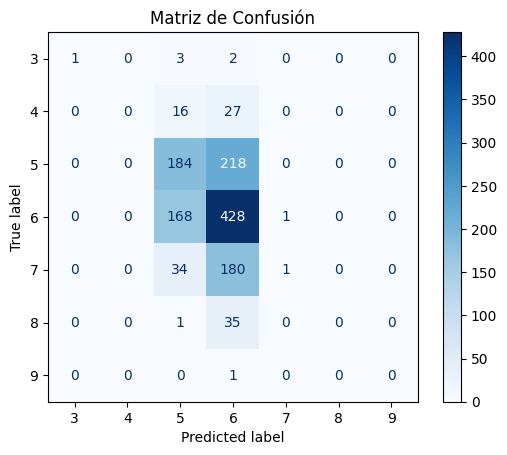

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de clasificación (por ejemplo, Regresión Logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Regresión con Máquinas de Vectores de Soporte (SVR):
  Error Cuadrático Medio: 0.6342107449071565
  Error Absoluto Medio: 0.6149673594772557
  Puntaje R-cuadrado: 0.14127203360101526

Regresión con Árboles de Decisión:
  Error Cuadrático Medio: 0.7015384615384616
  Error Absoluto Medio: 0.49846153846153846
  Puntaje R-cuadrado: 0.05010960273814569

Regresión con Gradient Boosting:
  Error Cuadrático Medio: 0.46225638226452054
  Error Absoluto Medio: 0.5314556685025912
  Puntaje R-cuadrado: 0.37410003491020294


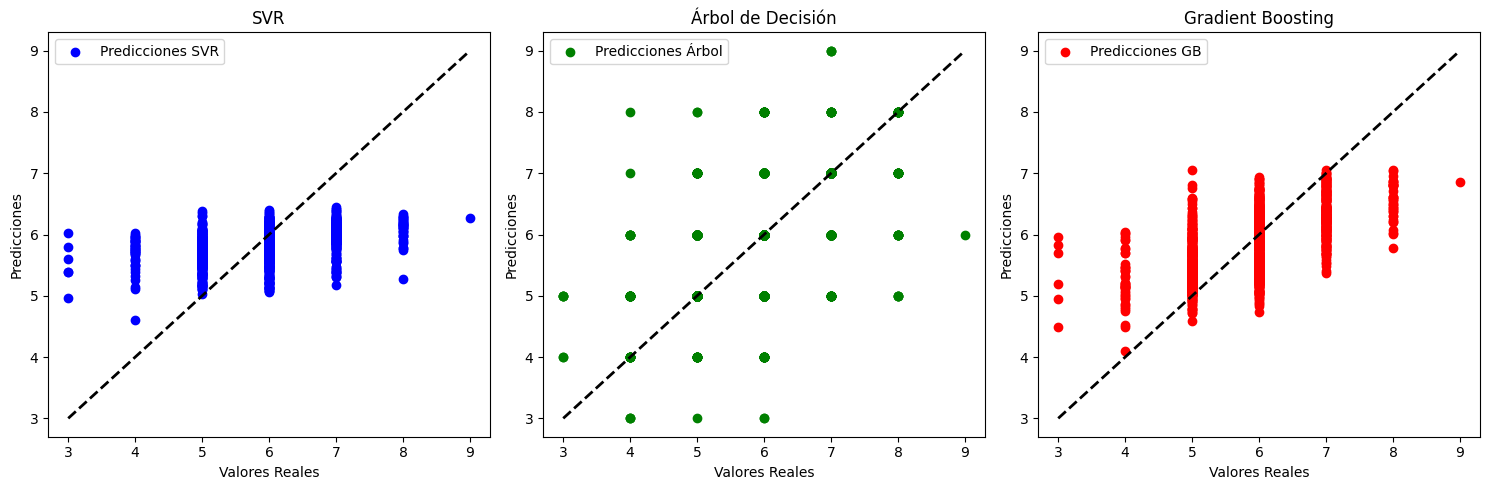

In [13]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Regresión con Máquinas de Vectores de Soporte (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Regresión con Árboles de Decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Regresión con Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluar los modelos
print("Regresión con Máquinas de Vectores de Soporte (SVR):")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_svr))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_svr))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_svr))

print("\nRegresión con Árboles de Decisión:")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_tree))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_tree))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_tree))

print("\nRegresión con Gradient Boosting:")
print("  Error Cuadrático Medio:", mean_squared_error(y_test, y_pred_gb))
print("  Error Absoluto Medio:", mean_absolute_error(y_test, y_pred_gb))
print("  Puntaje R-cuadrado:", r2_score(y_test, y_pred_gb))

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para SVR
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicciones SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR')
plt.legend()

# Gráfico para Árbol de Decisión
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, color='green', label='Predicciones Árbol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Decisión')
plt.legend()

# Gráfico para Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_gb, color='red', label='Predicciones GB')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()
